In [42]:
# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score,RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [19]:
# 📌 Step 2: Load Data
data = pd.read_csv("data.csv")
data.head()
data.isnull().sum()

timestamp                         0
equipment_energy_consumption    844
lighting_energy                 809
zone1_temperature               867
zone1_humidity                  801
zone2_temperature               853
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [25]:
#converting to numeric value
for col in data.columns:
    if col != 'timestamp':
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [27]:
# 📌 Step 3: Exploratory Data Analysis
#print(data.info())
#print(data.describe())
# 📌 Step 4: Handling Missing Values
# Fill missing values with column means
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].mean())
data.isnull().sum()



timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64

In [28]:
# Time feature engineering
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['day'] = data['timestamp'].dt.day
data['weekday'] = data['timestamp'].dt.weekday
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  16857 non-null  float64       
 2   lighting_energy               16857 non-null  float64       
 3   zone1_temperature             16857 non-null  float64       
 4   zone1_humidity                16857 non-null  float64       
 5   zone2_temperature             16857 non-null  float64       
 6   zone2_humidity                16857 non-null  float64       
 7   zone3_temperature             16857 non-null  float64       
 8   zone3_humidity                16857 non-null  float64       
 9   zone4_temperature             16857 non-null  float64       
 10  zone4_humidity                16857 non-null  float64       
 11  zone5_temperature           

In [29]:
# Drop original timestamp for modeling purposes
correlation_data = data.drop(['timestamp'], axis=1)


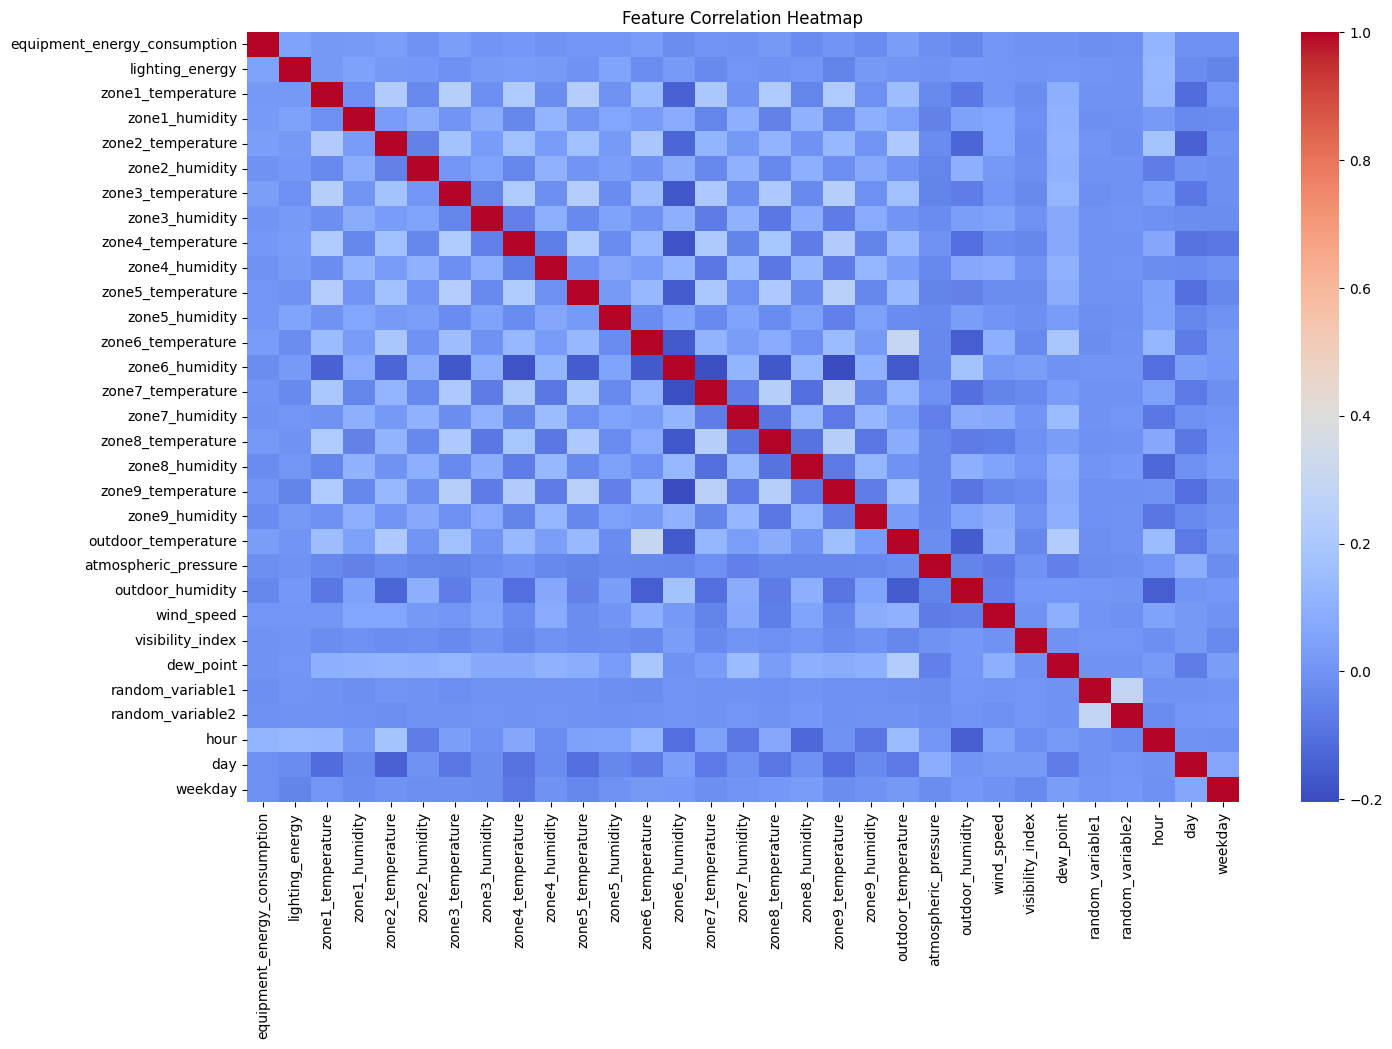

In [30]:
# Correlation heatmap
# Correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(correlation_data.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [31]:
# 📌 Step 8: Preprocessing
X = correlation_data.drop(['equipment_energy_consumption'], axis=1)
y = correlation_data['equipment_energy_consumption']

In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


array([[-5.75471405,  5.94054968,  0.88273107, ...,  0.79228014,
        -0.55432623, -1.50391323],
       [ 1.83514405, -0.64619844,  0.78947441, ...,  0.79228014,
        -0.55432623, -1.50391323],
       [ 1.83514405, -0.64619844,  0.74886819, ...,  0.79228014,
        -0.55432623, -1.50391323],
       ...,
       [-0.2773007 ,  0.06682752, -0.15031865, ..., -1.65958732,
        -1.46192314,  0.01066202],
       [-0.2773007 ,  0.59446673,  0.03240933, ...,  0.21537015,
        -1.34847352,  0.51552043],
       [-0.2773007 , -0.56221982,  0.49731611, ...,  0.50382514,
        -1.68882236,  0.01066202]])

In [34]:
# 📌 Step 9: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [35]:
# 📌 Step 10: Modeling - Random Forest as Base
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [36]:
# 📌 Step 11: Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.06362615131913796
RMSE: 173.599472470223
MAE: 72.5485623796676


In [37]:
# 📌 Step 12: Feature Importance
importances = rf.feature_importances_
feat_names = X.columns
feat_imp = pd.Series(importances, index=feat_names).sort_values(ascending=False)

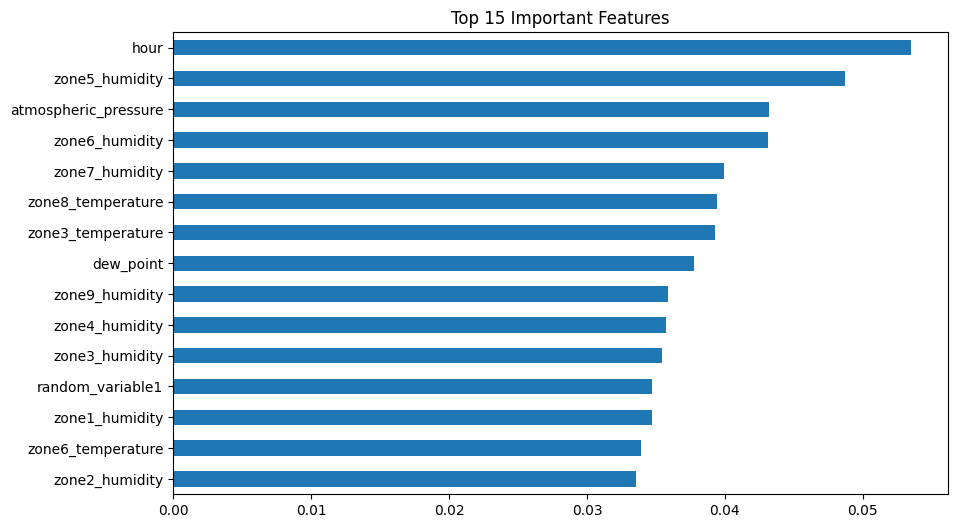

In [38]:
plt.figure(figsize=(10,6))
feat_imp[:15].plot(kind='barh')
plt.title("Top 15 Important Features")
plt.gca().invert_yaxis()
plt.show()


In [39]:
# 📌 Step 13: Evaluate Random Variables
print("Random Variable 1 Importance:", feat_imp.get('random_variable1', 'N/A'))
print("Random Variable 2 Importance:", feat_imp.get('random_variable2', 'N/A'))

Random Variable 1 Importance: 0.03474867376028362
Random Variable 2 Importance: 0.03319506852681867


In [40]:
# 📌 Step 14: Optional - Hyperparameter Tuning
# ✅ Consider activating this block for improved R²
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_
print("Tuned R2:", r2_score(y_test, best_model.predict(X_test)))

KeyboardInterrupt: 

In [ ]:
# 📌 Step 14: Hyperparameter Tuning (Improved with RandomizedSearchCV)
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}
rand_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist,
                                  n_iter=20, cv=3, scoring='r2', random_state=42, n_jobs=-1, verbose=1)
rand_search.fit(X_train, y_train)
print("Best Params:", rand_search.best_params_)
best_model = rand_search.best_estimator_
print("Tuned R2:", r2_score(y_test, best_model.predict(X_test)))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
